# Reverse Engineering the Saxton API



## To do:
[] convert API name from Saxton API to Saxton_API


## Contents:
1. Basic info of the API and inspection
2. Getting the paths and endpoints
3. Getting the objects with attributes
4. Writing it to json, plantuml and .csv

## 1. Basic info of the API and inspection

In [1]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie'

In [1]:
import glob
my_jsons=glob.glob('*.json')
my_yamls = glob.glob('*.yaml')
my_jsons, my_yamls

(['planningsverzoeken-api.json',
  'planningsverzoeken-api_data.json',
  'Saxton API_data.json',
  'saxton.json'],
 ['saxton.yaml'])

In [2]:
#loading the API into active dictionary
import json

with open('saxton.json') as f:
    spec = json.load(f)

In [3]:
print(list(spec))
print(type(spec))

['openapi', 'info', 'paths', 'components', 'security']
<class 'dict'>


In [4]:
OAS_version =spec['openapi']
API_name = spec['info']['title']
API_name = API_name.replace(" ", "_")
API_version =spec['info']['version']
API_version = "v"+API_version[:5]
print("OAS:", OAS_version, API_name, API_version)

OAS: 3.0.1 Saxton_API v0.1


## 2. Getting the paths and endpoints

In [5]:
paths =list(spec['paths'])
print(len(paths))
paths

endpoints_dict = {}
for i in range (len(paths)):
    endpoints_dict[paths[i]]=list(spec['paths'][paths[i]])
endpoints_dict

258


['/api/v0.1/ArchiveCompact/Documents/Search',
 '/api/v0.1/ArchiveCompact/Documents/{id}',
 '/api/v0.1/ArchiveCompact/Archives',
 '/api/v0.1/ArchiveCompact/Files',
 '/api/v0.1/ArchiveCompact/Documents',
 '/api/v0.1/Asbestos/Project',
 '/api/v0.1/Asbestos/Project/{id}',
 '/api/v0.1/Asbestos/Source',
 '/api/v0.1/Asbestos/Source/{id}',
 '/api/v0.1/Asbestos/Task',
 '/api/v0.1/Asbestos/Task/{id}',
 '/api/v0.1/{companyId}/AddressBook/Search',
 '/api/v0.1/AddressBook/Relations/Search',
 '/api/v0.1/Addresses/ZipCode/{zipcode}',
 '/api/v0.1/Bailiff/DebtSettlements/Search',
 '/api/v0.1/{companyId}Bailiff/DebtSettlements/{id}/CustomerVerdicts',
 '/api/v0.1/{companyId}/Bailiff/Customers/{id}/CustomerVerdicts',
 '/api/v0.1/{companyId}/Bailiff/DebtSettlements/{id}',
 '/api/v0.1/{companyId}/Bailiff/DebtSettlements/{id}/Transactions',
 '/api/v0.1/{companyId}/Bailiff/Customers/{id}/DebtSettlementsActive',
 '/api/v0.1/{companyId}/CommunityNotificationTypes',
 '/api/v0.1/{companyId}/CommunityNotificationA

In [15]:
spec['paths']['/api/v0.1/ArchiveCompact/Documents/Search']['post']['parameters'][0]['description']

'The environment settings to load'

In [26]:
#printing the paths, verbs and descriptions 
paths = list(spec['paths'])
for i in range (len(paths)):
    verbs = list(spec['paths'][paths[i]])
    for j in range (len(verbs)):
        try:
            description_string = spec['paths'][paths[i]][verbs[j]]['parameters'][0]['description']
            description_string = description_string.strip('\n')
            print(paths[i], verbs[j].upper(), description_string[:70])
        except:
            print(paths[i], verbs[j])

/api/v0.1/ArchiveCompact/Documents/Search POST The environment settings to load
/api/v0.1/ArchiveCompact/Documents/{id} GET Id of the document
/api/v0.1/ArchiveCompact/Archives GET The environment settings to load
/api/v0.1/ArchiveCompact/Files GET download info string
/api/v0.1/ArchiveCompact/Files POST The environment settings to load
/api/v0.1/ArchiveCompact/Documents POST The environment settings to load
/api/v0.1/Asbestos/Project POST The environment settings to load
/api/v0.1/Asbestos/Project/{id} PUT The asbestos project id
/api/v0.1/Asbestos/Source POST The environment settings to load
/api/v0.1/Asbestos/Source/{id} PUT The asbestos source id
/api/v0.1/Asbestos/Task POST The environment settings to load
/api/v0.1/Asbestos/Task/{id} PUT The asbestos task id
/api/v0.1/{companyId}/AddressBook/Search GET Id of the company
/api/v0.1/AddressBook/Relations/Search get
/api/v0.1/Addresses/ZipCode/{zipcode} GET Zipcode and housenumber of an address (e.g. 1234AA 1)
/api/v0.1/Bailiff/DebtS

## 3. Getting the objects

In [27]:
#inspection of the objects
spec['components']

{'schemas': {'Messier.Libraries.Saxton.Entities.AddressBook.AddressBook': {'type': 'object',
   'properties': {'companyId': {'type': 'string', 'nullable': True},
    'id': {'type': 'string', 'nullable': True},
    'referenceType': {'type': 'string', 'nullable': True},
    'displayName': {'type': 'string', 'nullable': True},
    'birthdate': {'type': 'string', 'format': 'date-time', 'nullable': True},
    'gender': {'$ref': '#/components/schemas/Messier.Libraries.Saxton.Entities.Persons.Gender'},
    'email': {'type': 'string', 'nullable': True},
    'phone': {'type': 'string', 'nullable': True},
    'mobilePhone': {'type': 'string', 'nullable': True},
    'address': {'$ref': '#/components/schemas/Messier.Libraries.Saxton.Entities.Addresses.AddressBookAddress'},
    'chamberOfCommerceNumber': {'type': 'string', 'nullable': True},
    'chamberOfCommerceCity': {'type': 'string', 'nullable': True},
    'vatNumber': {'type': 'string', 'nullable': True}},
   'additionalProperties': False},
 

In [28]:
objects = list(spec['components']['schemas'])
print(len(objects))
objects[0:5]

457


['Messier.Libraries.Saxton.Entities.AddressBook.AddressBook',
 'Messier.Libraries.Saxton.Entities.AddressBook.AddressBookRelationEntity',
 'Messier.Libraries.Saxton.Entities.Addresses.Address',
 'Messier.Libraries.Saxton.Entities.Addresses.AddressBookAddress',
 'Messier.Libraries.Saxton.Entities.Addresses.AddressCreate']

In [29]:
type(objects)

list

In [30]:
#inspection of an element in the list
list(spec['components']['schemas']['Messier.Libraries.Saxton.Entities.AddressBook.AddressBook']['properties'])

['companyId',
 'id',
 'referenceType',
 'displayName',
 'birthdate',
 'gender',
 'email',
 'phone',
 'mobilePhone',
 'address',
 'chamberOfCommerceNumber',
 'chamberOfCommerceCity',
 'vatNumber']

In [31]:
#script to remove the element 'Messier.Libraries.Saxton.Entities.' from each list item

objects_clean=[]
for i in range (len(objects)):
    my_string = str(objects[i])
    #print(my_string)
    my_string= my_string.replace("Messier.Libraries.Saxton.Entities.", "")
    #print(my_string)
    objects_clean.append(my_string)
objects_clean

['AddressBook.AddressBook',
 'AddressBook.AddressBookRelationEntity',
 'Addresses.Address',
 'Addresses.AddressBookAddress',
 'Addresses.AddressCreate',
 'Addresses.AddressPrimaryCreate',
 'Addresses.AddressPurpose',
 'Addresses.AddressUpdate',
 'Addresses.LogisticsAddress',
 'Addresses.Municipality',
 'Addresses.RealEstateAddress',
 'ArchiveCompact.Archive',
 'ArchiveCompact.Document',
 'ArchiveCompact.DocumentCreate',
 'ArchiveCompact.DocumentFile',
 'ArchiveCompact.DocumentFileCreate',
 'ArchiveCompact.DocumentFileVersion',
 'ArchiveCompact.DocumentSearch',
 'ArchiveCompact.Index',
 'ArchiveCompact.IndexCreate',
 'ArchiveCompact.IndexSearch',
 'Asbestos.AsbestosProject',
 'Asbestos.AsbestosSource',
 'Asbestos.AsbestosTask',
 'Asbestos.Disposal',
 'Asbestos.RealestateObjects',
 'Communications.Communication',
 'Communications.CommunicationCreate',
 'Communications.CommunicationPurpose',
 'Communications.CommunicationType',
 'Communications.CommunicationUpdate',
 'CommunityNotificatio

In [62]:
#creating a dictionary with objects and their properties

object_dict ={}
#objects = list(spec['components']['schemas'])
for i in range (len(objects)):
    try:
        object_dict[objects_clean[i]]=list(spec['components']['schemas'][objects[i]]['properties'])#use the objects_clean list and the objects list
    except:
        pass
list(object_dict)[0:10]

['AddressBook.AddressBook',
 'AddressBook.AddressBookRelationEntity',
 'Addresses.Address',
 'Addresses.AddressBookAddress',
 'Addresses.AddressCreate',
 'Addresses.AddressPrimaryCreate',
 'Addresses.AddressPurpose',
 'Addresses.AddressUpdate',
 'Addresses.LogisticsAddress',
 'Addresses.Municipality']

In [34]:
# option: convert to string. Split item based on "." Then create three levels: business domain, class, attribute. Create  
my_string = list(object_dict)[0]
my_list = my_string.split(".")
my_list[0]

'AddressBook'

In [76]:
my_object_list = list(object_dict)
my_key_list= []
for i in range (len(my_object_list)):
    my_string = my_object_list[i]
    my_list = my_string.split(".")
    my_key_list.append(my_list)
my_key_list[0:2]

[['AddressBook', 'AddressBook'], ['AddressBook', 'AddressBookRelationEntity']]

In [91]:
#Rommelcode om te kijken of het me lukt de address.adressses te splitsen in een geneste dictionary
my_silly_list = my_key_list[0:2]
my_silly_dict = {}
for i in range(len(my_key_list)):
    my_previous_item = my_key_list[i-1]
    my_item = my_key_list[i]
    #print(my_item)
    if my_item[0] == my_previous_item[0]:
        print (my_item[0], my_previous_item[0])
        try:
        object_dict[objects_clean[i]]=list(spec['components']['schemas'][objects[i]]['properties'])#use the objects_clean list and the objects list
    except:
        pass

IndentationError: expected an indented block (Temp/ipykernel_39268/2585728510.py, line 11)

In [71]:
object_dict2 ={}
#objects = list(spec['components']['schemas'])
for i in range (len(my_key_list)):
    try:
        object_dict2[str(my_key_list[i][1])] = list(spec['components']['schemas'][objects[i]]['properties'])#use the objects_clean list and the objects list
    except:
        pass
object_dict2

{'AddressBook': ['companyId',
  'id',
  'referenceType',
  'displayName',
  'birthdate',
  'gender',
  'email',
  'phone',
  'mobilePhone',
  'address',
  'chamberOfCommerceNumber',
  'chamberOfCommerceCity',
  'vatNumber'],
 'AddressBookRelationEntity': ['organizationId',
  'name',
  'roleType',
  'validFrom',
  'validTo'],
 'Address': ['city',
  'country',
  'houseNumber',
  'houseNumberAddition',
  'street',
  'zipCode',
  'addressPurpose',
  'id',
  'displayAddress',
  'validFrom'],
 'AddressBookAddress': ['city',
  'country',
  'houseNumber',
  'houseNumberAddition',
  'street',
  'zipCode',
  'addressPurpose'],
 'AddressCreate': ['city',
  'country',
  'houseNumber',
  'houseNumberAddition',
  'street',
  'zipCode',
  'validFrom',
  'addressPurposeId'],
 'AddressPrimaryCreate': ['city',
  'country',
  'houseNumber',
  'houseNumberAddition',
  'street',
  'zipCode',
  'validFrom'],
 'AddressPurpose': ['id', 'description'],
 'AddressUpdate': ['city',
  'country',
  'houseNumber',
 

In [69]:
object_dict2 ={}
#objects = list(spec['components']['schemas'])
for i in range (len(my_key_list)):
    try:
        object_dict2[str(my_key_list[i][0])] = list(object_dict2[str(my_key_list[i][1])]) + list(spec['components']['schemas'][objects[i]]['properties'])#use the objects_clean list and the objects list
    except:
        pass
object_dict2

{}

In [19]:
# TO DO search for Smoke alarm

In [64]:
object_dict2 ={}
#objects = list(spec['components']['schemas'])
for i in range (len(my_key_list)):
    try:
        object_dict2[[my_key_list[i]]]= 'hallo'
    except:
        pass
object_dict2

{}

In [21]:
object_dict['AddressBook.AddressBook']

['companyId',
 'id',
 'referenceType',
 'displayName',
 'birthdate',
 'gender',
 'email',
 'phone',
 'mobilePhone',
 'address',
 'chamberOfCommerceNumber',
 'chamberOfCommerceCity',
 'vatNumber']

In [60]:
#converting the python dict to a JSON 
import json 
      
# Serializing json  
json_object = json.dumps(object_dict, indent = 4) 
print(json_object)

{
    "AddressBook.AddressBook": [
        "companyId",
        "id",
        "referenceType",
        "displayName",
        "birthdate",
        "gender",
        "email",
        "phone",
        "mobilePhone",
        "address",
        "chamberOfCommerceNumber",
        "chamberOfCommerceCity",
        "vatNumber"
    ],
    "AddressBook.AddressBookRelationEntity": [
        "organizationId",
        "name",
        "roleType",
        "validFrom",
        "validTo"
    ],
    "Addresses.Address": [
        "city",
        "country",
        "houseNumber",
        "houseNumberAddition",
        "street",
        "zipCode",
        "addressPurpose",
        "id",
        "displayAddress",
        "validFrom"
    ],
    "Addresses.AddressBookAddress": [
        "city",
        "country",
        "houseNumber",
        "houseNumberAddition",
        "street",
        "zipCode",
        "addressPurpose"
    ],
    "Addresses.AddressCreate": [
        "city",
        "country",
       

## 4. Writing it to a .json, plantuml and .csv file

In [61]:
#writing it to a json
import json
with open(API_name+'_data.json', 'w', encoding='utf-8') as f:
    json.dump(json_object, f, ensure_ascii=False, indent=4)

In [62]:
import glob
my_jsons = glob.glob('*.json')
my_jsons

['planningsverzoeken-api.json',
 'planningsverzoeken-api_data.json',
 'Saxton API_data.json',
 'saxton.json',
 'vastgoed_data.json']

In [68]:
textfile = open("plantuml_Saxton_API_data.txt", "w")
textfile.write('@startuml\n')
for key, value in object_dict.items():
    textfile.write('class '+str(key) +'{\n')
    for i in range (len(value)):
        textfile.write(value[i] + "\n")
    textfile.write('}\n')
textfile.write('@enduml')
textfile.close() 

In [5]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie'

In [2]:
import glob
my_txts = glob.glob('*.txt')
my_txts

['onderhoudsverzoeken-api_API_plantuml.txt',
 'plantuml_inspectieorders-api_data.txt',
 'plantuml_planningsverzoeken-api_data.txt',
 'plantuml_planningsverzoeken.txt',
 'plantuml_Saxton API_data.txt',
 'plantuml_Saxton_API_data_inspection.txt',
 'Saxton_API_datamodel_A.txt',
 'Saxton_API_datamodel_C.txt',
 'Saxton_API_datamodel_D-G.txt',
 'Saxton_API_datamodel_H-M.txt',
 'Saxton_API_datamodel_N-Z.txt']

In [3]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\plantuml_Saxton_API_data_inspection.txt

In [4]:
#convert the txt file to an .png image using plantuml
!python -m plantuml plantuml_Saxton_API_data_inspection.txt

[{'filename': 'plantuml_Saxton_API_data_inspection.txt', 'gen_success': True}]


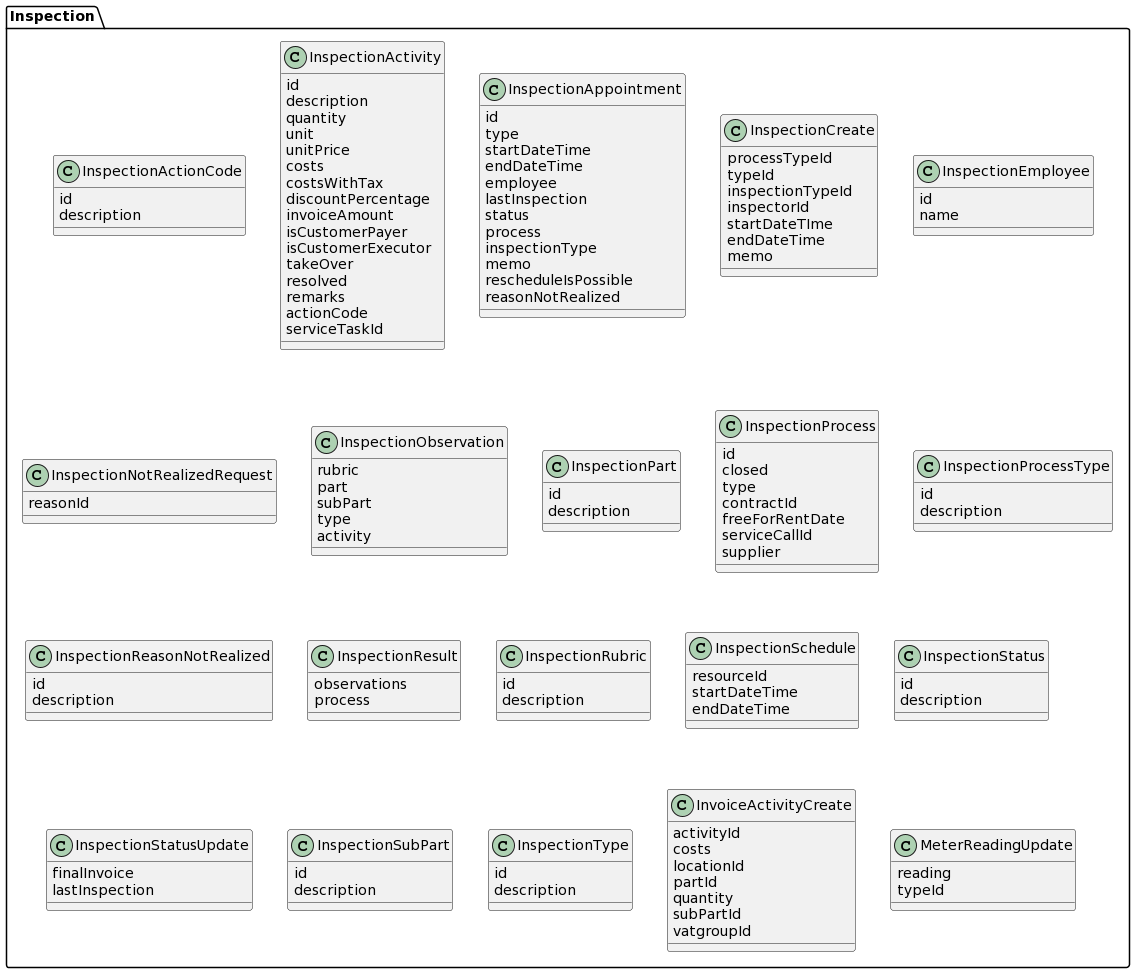

In [6]:
#show the generated png
from IPython import display
display.Image(filename="plantuml_Saxton_API_data_inspection.png", width=500, height=500)

## Write it to a .csv file

 a .csv file with a ; seperator between key and values

In [8]:
with open(API_name+"_API_objecten.csv", mode="w") as my_csv:
    for key, value in object_dict.items():
        my_csv.write(str(key)+";")
        for i in range (len(value)-1):
            my_csv.write(value[i]+",")#write values + a comma  
        my_csv.write(value[-1]+"\n") #write last value (and no comma)

NameError: name 'object_dict' is not defined

In [74]:
import glob
my_csvs=glob.glob('*.csv')
my_csvs

['planningsverzoeken-api_data.csv', 'Saxton API_data.csv']

In [75]:
#check the plantuml file manually
%pycat C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\VERA\\Saxton API_data.csv

### Saxton API endpoint: ServiceTask

In [43]:
PlanProposal = '''
  {
    "id": "string",
    "deadlineExceeded": true,
    "startDateTime": "2022-03-08T11:00:31.553Z",
    "endDateTime": "2022-03-08T11:00:31.553Z",
    "resource": {
      "id": "string",
      "employeeId": "string",
      "name": "string"
    },
    "blockTime": {
      "startDateTime": "2022-03-08T11:00:31.553Z",
      "endDateTime": "2022-03-08T11:00:31.553Z",
      "description": "string"
    },
    "sequence": 0
  }
'''

In [44]:
import json
service_task_dict = json.loads(PlanProposal)

# the result is a Python dictionary:
print(service_task_dict)

{'id': 'string', 'deadlineExceeded': True, 'startDateTime': '2022-03-08T11:00:31.553Z', 'endDateTime': '2022-03-08T11:00:31.553Z', 'resource': {'id': 'string', 'employeeId': 'string', 'name': 'string'}, 'blockTime': {'startDateTime': '2022-03-08T11:00:31.553Z', 'endDateTime': '2022-03-08T11:00:31.553Z', 'description': 'string'}, 'sequence': 0}


In [45]:
for key, value in service_task_dict.items():
    print(key)
    if str(type(value)) == "<class 'dict'>":
        nested = value
        for key, value in nested.items():
            print("  " +key)

id
deadlineExceeded
startDateTime
endDateTime
resource
  id
  employeeId
  name
blockTime
  startDateTime
  endDateTime
  description
sequence


In [46]:
with open("PlanProposal.csv", mode="w") as csv_file:
    for key, value in service_task_dict.items():
        csv_file.write(str(key)+"\n")
        if str(type(value)) == "<class 'dict'>":
            nested = value
            for key, value in nested.items():
                csv_file.write("  " +key+"\n")
    
    
    #for key, value in object_dict.items():
    #    csv_file.write(str(key)+";")
    #    for i in range (len(value)-1):
    #        csv_file.write(value[i]+",")#write values + a comma  
    #    csv_file.write(value[-1]+"\n") #write last value (and no comma) 

In [47]:
import glob
my_csvs = glob.glob('*.csv')
my_csvs

['onderhoudsverzoeken-api_data.csv',
 'planningsverzoeken-api_data.csv',
 'PlanProposal.csv',
 'Saxton API_API_objecten.csv',
 'Saxton API_data.csv',
 'ServiceTask.csv',
 'ServiceTaskID.csv']

In [30]:
pwd

'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie'

In [42]:
%pycat 'C:\\Users\\31653\\Documents\\GitHub\\Notebooks\\de_alliantie\ServiceTaskID.csv' 